In [1]:
import numpy as np
import pandas as pd

# 4 NumPy Basics: Arrays and Vectorized Computation

NumPY short for numerical python, good for numerical computing in python. ndarray, an efficient multidimentsional array good for flexible broadcasting capabilities. 

In [2]:
my_arr = np.arange(1000000)

In [3]:
my_list = list(range(1000000))

In [5]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 17.3 ms, sys: 14.8 ms, total: 32.1 ms
Wall time: 43.2 ms


In [6]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 249 ms, sys: 75.2 ms, total: 324 ms
Wall time: 344 ms


NumPy based algorithms are generally 10 to 100 times faster than their pur python counterparts and use significantly less memory.

## 4.1 The NumPy ndarray: A Multidimensional Array Object

one of the key featuers of numpy is its n-dimensional array object (ndarray), which is a fast, flexible container for large datasets in python.

In [7]:
data = np.random.randn(2, 3) #generate some random data

In [8]:
data 

array([[-0.82570814, -0.68080259, -0.46071212],
       [-0.90995994, -0.12167156, -0.05096927]])

In [9]:
data * 10

array([[-8.2570814 , -6.8080259 , -4.60712123],
       [-9.0995994 , -1.21671559, -0.50969274]])

In [10]:
data + data

array([[-1.65141628, -1.36160518, -0.92142425],
       [-1.81991988, -0.24334312, -0.10193855]])

an ndarray is a generic multidimensional container for homogeneous data(all elements must be the same type)  
every array has shape and dtype  
.shape produces tuple indicating the size of each dimension  
.dtype produces the data type of the array

In [11]:
data.shape

(2, 3)

In [12]:
data.dtype

dtype('float64')

### Creating ndarrays

create array use the array function. accepts any sequence like object (including other arrays) and produces a new numpy array

In [13]:
data1 = [6, 7.5, 8, 0, 1]

In [14]:
arr1 = np.array(data1)

In [15]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

nested sequences will be converted into a multidimensonal array:

In [16]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

In [17]:
arr2 = np.array(data2)

In [18]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

data2 was list of lists, numpy arr2 has 2 dimensions, with shape inferred from the data. can confirm this by inspecting the ndim(dimension) and shape attributes

In [19]:
arr2.ndim

2

In [20]:
arr2.shape

(2, 4)

np.array tries to infer a good data type for the array it creates. 

In [21]:
arr1.dtype

dtype('float64')

In [22]:
arr2.dtype

dtype('int64')

other functions for creating new data types 
  
    -zeros and ones create arrays of 0s or 1s with a given length or shape  
    -empty creates an array without initializing its values to any particular value. 
    to create a. higher dimensional array with these methods, pass a tuple for the shape

In [23]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [25]:
np.empty((2, 3, 2))

array([[[0.00000000e+000, 1.00937611e-320],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 1.16095484e-028]],

       [[6.59798177e+246, 2.59027907e-144],
        [4.82412328e+228, 1.04718130e-142],
        [3.99914461e+252, 1.46030983e-319]]])

**np.empty cna return an array of all 0s or it might return uninitialzed "garbage" values**

arange is an array-valued version of the built-in python range functions

In [26]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Data Types for ndarrays

data type or dtype is a special object containing the info (metadata).

In [29]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

In [31]:
arr2 = np.array([1, 2, 3,], dtype=np.int32)

In [32]:
arr1.dtype

dtype('float64')

In [33]:
arr2.dtype

dtype('int32')

you can convert or cast an array from one dtype to another using ndarray's **astype** method

In [34]:
arr = np.array([1, 2, 3, 4, 5])

In [36]:
arr.dtype

dtype('int64')

In [37]:
float_arr = arr.astype(np.float64)

In [38]:
float_arr.dtype

dtype('float64')

if cast floating-point to integer, the decimal part will be truncated:

In [39]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

In [40]:
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [41]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

converting strings(representing numbers) to numeric form using **astype**

In [42]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [43]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

you can also use another array's dtype attribute:

In [44]:
int_array = np.arange(10)

In [45]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

In [46]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [47]:
empty_uint32 = np.empty(8, dtype='u4')

In [48]:
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

**calling astype always creates a new array (a copy of the data), even if the new dtype is the same as the old dtype**

### Arithmetic with NumPy Arrays

arrays enable you to express batch operations on data without writing any for loops. this is called _vectorization_  any arithmetic operations between equal-size arrays applies the operation element-wise:

In [49]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

In [50]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [51]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [52]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

arithmetic operations with scalars propagate the scalar argument to each element in the array:

In [53]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [54]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

comparisons between arrays of the same size yield boolean arrays:

In [55]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

In [56]:
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [57]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### Basic Indexing and Slicing

one-dimensional arrays on the surface act similar to python lists:

In [58]:
arr = np.arange(10)

In [59]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
arr[5]

5

In [61]:
arr[5:8]

array([5, 6, 7])

In [62]:
arr[5:8] = 12 #the value is broadcasted to the entire selection

In [63]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

**important distinction from pythons list is that array slices are _views_ on the original array**.    
this means the data is not copied, and any modifications to the view will be reflected in the source array. example below:

In [64]:
arr_slice = arr[5:8]

In [65]:
arr_slice

array([12, 12, 12])

In [66]:
arr_slice[1] = 12345

In [67]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

**the "bare" slice [:] will assign to all values in an array:**

In [68]:
arr_slice[:] = 64

In [69]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

if you want to copy a slice of an ndarray instead of a view, you will need to explicitly copy the array- for example, arr[5:8].copy()

in two-dimensional array the elements at each index are no longer scalars but rather one-dimensional arrays:

In [70]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [71]:
arr2d[2]

array([7, 8, 9])

In [72]:
arr2d[0][2] #accessed recursively

3

In [73]:
arr2d[0, 2] #accessed with comma-separated list of indices

3

_helpful to think of axis 0 as "rows" and axis 1 as columns_

In multidimensional arrays, if you omit later indices, the returned object will be a lower dimensional ndarray. so in the 2 x 2 x 3 array arr3d:

In [74]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [75]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [76]:
arr3d[0] # this is a 2 x 3 array

array([[1, 2, 3],
       [4, 5, 6]])

In [77]:
old_values = arr3d[0].copy() #assigning array

In [78]:
arr3d[0] = 42 #assigning scalar value

In [79]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [80]:
arr3d[0] = old_values 

In [81]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[1, 0] gives all the values whose indices start with (1, 0) forming a one-dimensional array

In [82]:
arr3d[1, 0]

array([7, 8, 9])

this is the same as if we had indexed in two steps:

In [83]:
x = arr3d[1]

In [84]:
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [85]:
x[0]

array([7, 8, 9])

_note that in all of these cases where subsections of the array have been selected, the returned arrays are views_

#### Indexing with Slices

like one-dimensional objects such as python lists, nd arrays can be sliced with the familiar syntax:

In [86]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [87]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

slicing two-dimensional array:

In [88]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [89]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

slices along axis 0. Think of it as arr2d[:2] "select the first two rows of arr2d"

In [90]:
arr2d[:2, 1:] #pass multiple slices just like multiple indexes

array([[2, 3],
       [5, 6]])

when slicing like this, you always obtain array views of the same number of dimensions. By mixing integer indexes and slices, you get lower dimensional slices. 

In [91]:
arr2d[1, :2] #select the second row, but only the first two columns

array([4, 5])

In [92]:
arr2d[:2, 2] #select the third column but only the first two rows

array([3, 6])

**the colon by itself means to take the entire axis**

In [93]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [94]:
arr2d[:2, 1:] = 0 #assigning to a slice expression assigns to the whole section

In [95]:
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean Indexing

In [4]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [5]:
data = np.random.randn(7, 4)

In [6]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [10]:
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.4673659 , -0.90727103,  1.03483368, -0.1289616 ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [-0.81172899, -0.43652113,  0.29660731,  0.67427685],
       [-0.27731322,  0.65982203, -1.74283232,  0.79291294]])

In [11]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [12]:
data[names == 'Bob']

array([[7., 7., 7., 7.],
       [7., 7., 7., 7.]])

In [13]:
data[names == 'Bob', 2:]

array([[7., 7.],
       [7., 7.]])

In [14]:
data[names == 'Bob', 3]

array([7., 7.])

In [15]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [16]:
data[~(names == 'Bob')]

array([[ 0.4673659 , -0.90727103,  1.03483368, -0.1289616 ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [-0.81172899, -0.43652113,  0.29660731,  0.67427685],
       [-0.27731322,  0.65982203, -1.74283232,  0.79291294]])

In [17]:
cond = names == 'Bob'

In [18]:
data[~cond]

array([[ 0.4673659 , -0.90727103,  1.03483368, -0.1289616 ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [-0.81172899, -0.43652113,  0.29660731,  0.67427685],
       [-0.27731322,  0.65982203, -1.74283232,  0.79291294]])

selecting two of the three names to combine multiple boolean conditions, use boolean arithmetic operators like & and |

In [19]:
mask = (names == 'Bob') | (names == 'Will')

In [20]:
mask

array([ True, False,  True,  True,  True, False, False])

In [21]:
data[mask]

array([[7., 7., 7., 7.],
       [7., 7., 7., 7.],
       [7., 7., 7., 7.],
       [7., 7., 7., 7.]])

In [22]:
data[data < 0] = 0


In [23]:
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.4673659 , 0.        , 1.03483368, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.29660731, 0.67427685],
       [0.        , 0.65982203, 0.        , 0.79291294]])

In [24]:
data[names != 'Joe'] = 7

In [25]:
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.4673659 , 0.        , 1.03483368, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.29660731, 0.67427685],
       [0.        , 0.65982203, 0.        , 0.79291294]])

### Fancy Indexing

_Fancy indexing_ is a term to describe indexing using integer arrays. example using 8 x 4 array:

In [26]:
arr = np.empty((8, 4))

In [28]:
for i in range(8):
    arr[i] = i

In [29]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

to select out a subset of the rows in a particular order, you can pass a list or ndarray of integers specifying the desired order:

In [30]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [31]:
arr[[-3, -5, -7]] #negative indices selects rows from the end:

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

passing multiple index arrays does seomthing slightly different; it selects a one-dimensional array of elements corresponding to each tuple of indices:

In [32]:
arr = np.arange(32).reshape((8, 4))

In [33]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [34]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

here elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected

In [35]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]] #rectangular region formed by selecting a subset of the matrix's rows and columns

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

**Keep in mind fancy indexing, unlike slicing, always copies the data into a new array**

### Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything. Arrays have the transpose method and also the special T attribute

In [36]:
arr = np.arange(15).reshape((3, 5))

In [37]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [38]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

_computing the inner matrix product using np.dot:_

In [39]:
arr = np.random.randn(6, 3)

In [40]:
arr

array([[-0.28133816,  0.56731395,  1.79881735],
       [ 0.35343732, -0.19829383,  0.29797056],
       [ 1.60378105,  0.15836977, -0.46274296],
       [-1.97260508,  0.42812826,  1.41842372],
       [ 0.89489587, -1.77442439, -0.03185775],
       [-1.05532931, -0.12748635, -0.05496069]])

In [41]:
np.dot(arr.T, arr)

array([[ 8.58191212, -2.27361402, -3.91139803],
       [-2.27361402,  3.73437505,  1.55892713],
       [-3.91139803,  1.55892713,  5.55462281]])

For higher dimensional arrays, transpose will accept a tuple of axis numbers to permute the axes:

In [42]:
arr = np.arange(16).reshape((2, 2, 4))

In [43]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [44]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

here the axes have been reordered with the second axis first, the first axis second, and the last axis unchanged

simple transposing with .T is a special case of swapping axes. ndarray has the method swapaxes, which takes a pair of axis numbers and switches the indicated axes to rearrange the data:

In [45]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [46]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

**swapaxes similarly returns a view on the data without making a copy**

## 4.2 Universal Functions: Fast Element-Wise Array Functions

A universal funciont(ufunc) is a func that performs element-wise operations on data in ndarrays.   
   
   Many ufuncs are simple element-wise transformations, like sqrt or exp:

In [2]:
arr = np.arange(10)

In [3]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [5]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

These are unary ufuncs. others such as add or maximum, take two arrays (and are known as binary ufuncs)

In [6]:
x = np.random.randn(8)

In [7]:
y = np.random.randn(8)

In [8]:
x

array([-0.88608053, -1.04186452, -1.31136539,  0.50291671,  0.02546749,
       -0.30680382, -1.18665826, -0.32772312])

In [9]:
y

array([-1.10454659,  0.37528407,  0.85858855, -0.49762011, -0.18642934,
       -0.09207933, -1.09704526,  0.99055889])

In [12]:
np.maximum(x, y)

array([-0.88608053,  0.37528407,  0.85858855,  0.50291671,  0.02546749,
       -0.09207933, -1.09704526,  0.99055889])

modf returns the franctional and integral parts of a floating-point array

In [13]:
arr = np.random.randn(7) *5

In [14]:
arr

array([-5.00619768, -4.08923452, -1.41446306, -0.63587968,  8.92133919,
        0.11514748,  2.23641352])

In [15]:
remainder, whole_part = np.modf(arr)

In [17]:
whole_part

array([-5., -4., -1., -0.,  8.,  0.,  2.])

In [18]:
remainder

array([-0.00619768, -0.08923452, -0.41446306, -0.63587968,  0.92133919,
        0.11514748,  0.23641352])

ufuncs accept an optional out argument that allows them to operate in-place on arrays:

In [19]:
arr

array([-5.00619768, -4.08923452, -1.41446306, -0.63587968,  8.92133919,
        0.11514748,  2.23641352])

In [20]:
np.sqrt(arr)

/var/folders/rw/1rnjc7b90vd_mr3753j04_s40000gp/T/ipykernel_26541/2296558006.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)


array([       nan,        nan,        nan,        nan, 2.98686109,
       0.33933388, 1.49546432])

In [21]:
np.sqrt(arr, arr)

/var/folders/rw/1rnjc7b90vd_mr3753j04_s40000gp/T/ipykernel_26541/269955669.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, arr)


array([       nan,        nan,        nan,        nan, 2.98686109,
       0.33933388, 1.49546432])

In [22]:
arr

array([       nan,        nan,        nan,        nan, 2.98686109,
       0.33933388, 1.49546432])

## 4.3 Array-Oriented Programming with Arrays

replacing explicit loops with array expressions in called vectorization.   

example: evaluate function sqrt(x^2 + y^2) accross a regular grid of values. np.meshgrid function take two 1D arrays and produces two 2D matrices corresponding to all pairfs of (x, y) in the two arrays.

In [23]:
points = np.arange(-5, 5, 0.01) #1000 equally spaced points

In [24]:
xs, ys = np.meshgrid(points, points)

In [25]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [26]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [27]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [30]:
import matplotlib.pyplot as plt

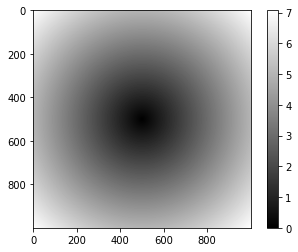

In [31]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

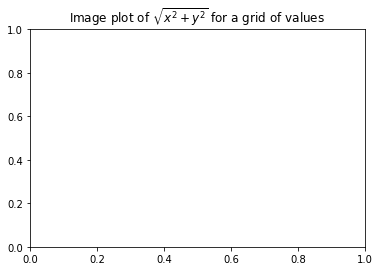

In [32]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### Expressing Conditional Logic as Array Operations

The numpy.where function is a vectorized version of the ternary expression x if condition else y. 

In [33]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

In [34]:
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [35]:
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value fro xarr whenever the corresponding value in codn is True, and otherwise take the value from yarr.   
list comprehension would look like this:

In [37]:
result = [(x if c else y)
         for x, y, c in zip(xarr, yarr, cond)]

In [38]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

writing same thing with np.where

In [39]:
result = np.where(cond, xarr, yarr)

In [40]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

matrix of randomly generated data, replace all positive values with 2 and negative values with -2:

In [42]:
arr = np.random.randn(4, 4)

In [43]:
arr

array([[ 1.08427213, -1.3498199 , -1.03987732,  1.27639539],
       [ 0.00361591, -0.45407476, -0.38319797,  1.33589728],
       [-0.15776574,  0.2554814 ,  2.15233468,  1.93581281],
       [ 0.47392848, -1.23987545, -0.66659272, -1.74076339]])

In [44]:
arr > 0

array([[ True, False, False,  True],
       [ True, False, False,  True],
       [False,  True,  True,  True],
       [ True, False, False, False]])

In [45]:
np.where(arr > 0, 2, -2)

array([[ 2, -2, -2,  2],
       [ 2, -2, -2,  2],
       [-2,  2,  2,  2],
       [ 2, -2, -2, -2]])

you can combine scalars and arrays when using np.where. for example, can replace all positive values in arr with constant 2:

In [46]:
np.where(arr > 0, 2, arr) #set only positive values to 2

array([[ 2.        , -1.3498199 , -1.03987732,  2.        ],
       [ 2.        , -0.45407476, -0.38319797,  2.        ],
       [-0.15776574,  2.        ,  2.        ,  2.        ],
       [ 2.        , -1.23987545, -0.66659272, -1.74076339]])

### Mathematical and Statistical Methods

Aggregations often called reductions like sum, mean and std can be accessed by calling the array instance method or using the top-level NumPy function

In [2]:
arr = np.random.randn(5, 4)

In [3]:
arr

array([[ 0.38486797, -0.73363353, -0.04170919, -1.00724988],
       [ 1.19724768,  0.20009645, -0.45014851,  1.36582141],
       [-0.45855052,  0.38560113, -0.46639393, -0.86394104],
       [ 0.84488144, -0.04654763,  0.29721686,  0.27143518],
       [ 0.48613154,  1.61095727,  0.03040796, -1.17605689]])

In [4]:
arr.mean()

0.09152168867131097

In [5]:
np.mean(arr)

0.09152168867131097

In [6]:
arr.sum()

1.8304337734262193

functions like mean and suim take an optional axis argument that computes the statistic over the given axis, resulting in an array with one fewer dimension:


In [7]:
arr.mean(axis=1)

array([-0.34943116,  0.57825426, -0.35082109,  0.34174646,  0.23785997])

In [8]:
arr.sum(axis=0)

array([ 2.4545781 ,  1.41647369, -0.63062681, -1.40999122])

here, arr.mean(1) means "compute mean across the columns" where arr.sum(0) means "compute sum down the rows".   
   
   other methods like cumsum and cumprod do not aggregate, instead producing an array of the intermediate results:

In [9]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [10]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

in multidimensinal arrays, accumulation functions like cumsum return an array of the same size, but with the partial aggregates computed along the indicated axis according to each lower dimensional slice:

In [11]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [12]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [13]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [14]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])